## Assessing and Cleaning the Data

I start by importing the dog dataset and doing some quick cleaning. 


In [130]:
import pandas as pd
import numpy as np
df=pd.read_csv('https://data.cityofnewyork.us/resource/nu7n-tubp.csv?$limit=130000')

In [131]:
df.head()

,rownumber,animalname,animalgender,animalbirth,breedname,borough,zipcode,communitydistrict,censustract2010,nta,citycouncildistrict,congressionaldistrict,statesenatorialdistrict,licenseissueddate,licenseexpireddate
0,533,BONITA,F,2013-05-01T00:00:00.000,Unknown,Queens,11435.0,412.0,208.0,QN61,28.0,5.0,10.0,2014-10-24T00:00:00.000,2017-11-15T00:00:00.000
1,548,ROCKY,M,2014-05-01T00:00:00.000,Labrador Retriever Crossbreed,Queens,11691.0,414.0,100801.0,QN15,31.0,5.0,10.0,2014-10-25T00:00:00.000,2019-10-25T00:00:00.000
2,622,BULLY,M,2010-07-01T00:00:00.000,American Pit Bull Terrier/Pit Bull,Queens,11419.0,410.0,98.0,QN55,28.0,5.0,10.0,2014-10-28T00:00:00.000,2016-09-24T00:00:00.000
3,633,COCO,M,2005-02-01T00:00:00.000,Labrador Retriever,Queens,11692.0,414.0,964.0,QN12,31.0,5.0,10.0,2014-10-29T00:00:00.000,2017-10-29T00:00:00.000
4,655,SKI,F,2012-09-01T00:00:00.000,American Pit Bull Terrier/Pit Bull,Queens,11691.0,414.0,100802.0,QN15,31.0,5.0,10.0,2014-10-31T00:00:00.000,2019-10-31T00:00:00.000


In [132]:
df.shape

(121949, 15)

There are some columns that I won't use for this project, so I drop them.

In [133]:
df.drop(columns=['communitydistrict','censustract2010','citycouncildistrict','congressionaldistrict',
                'statesenatorialdistrict'],inplace=True)

Next I rename some of the columns.

In [134]:
df.rename(columns={'animalname':'name','animalgender':'sex','animalbirth':'birth_date',
                   'breedname':'breed_name','licenseissueddate':'issued','licenseexpireddate':'expired'},inplace=True)

In [135]:
df.head()

,rownumber,name,sex,birth_date,breed_name,borough,zipcode,nta,issued,expired
0,533,BONITA,F,2013-05-01T00:00:00.000,Unknown,Queens,11435.0,QN61,2014-10-24T00:00:00.000,2017-11-15T00:00:00.000
1,548,ROCKY,M,2014-05-01T00:00:00.000,Labrador Retriever Crossbreed,Queens,11691.0,QN15,2014-10-25T00:00:00.000,2019-10-25T00:00:00.000
2,622,BULLY,M,2010-07-01T00:00:00.000,American Pit Bull Terrier/Pit Bull,Queens,11419.0,QN55,2014-10-28T00:00:00.000,2016-09-24T00:00:00.000
3,633,COCO,M,2005-02-01T00:00:00.000,Labrador Retriever,Queens,11692.0,QN12,2014-10-29T00:00:00.000,2017-10-29T00:00:00.000
4,655,SKI,F,2012-09-01T00:00:00.000,American Pit Bull Terrier/Pit Bull,Queens,11691.0,QN15,2014-10-31T00:00:00.000,2019-10-31T00:00:00.000


In [136]:
df.dtypes

rownumber       int64
name           object
sex            object
birth_date     object
breed_name     object
borough        object
zipcode       float64
nta            object
issued         object
expired        object
dtype: object

I change the 'zip' column type to string, and the date columns to date type. I also create a 'birth_year' column. 

In [137]:
#change date columns to datetime
df['birth_date']=pd.to_datetime(df['birth_date'])
df['issued']=pd.to_datetime(df['issued'])
df['expired']=pd.to_datetime(df['expired'])

#change zip column from float to string
df['zipcode']=df.zipcode.fillna(0).astype(int)
df['zipcode']=df.zipcode.astype(str)

#create birth_year column
df['birth_year']=df['birth_date'].dt.year
df['birth_year']=df.birth_year.fillna(0).astype(int)

I next look at nan values. 

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121949 entries, 0 to 121948
Data columns (total 11 columns):
rownumber     121949 non-null int64
name          121714 non-null object
sex           121948 non-null object
birth_date    121948 non-null datetime64[ns]
breed_name    121948 non-null object
borough       121948 non-null object
zipcode       121949 non-null object
nta           118612 non-null object
issued        121948 non-null datetime64[ns]
expired       121948 non-null datetime64[ns]
birth_year    121949 non-null int32
dtypes: datetime64[ns](3), int32(1), int64(1), object(6)
memory usage: 9.8+ MB


It looks like 'name' and 'nta' (neighborhood code) is missing from some rows. Also there seems to be one row with a lot of missing values. Let's look at a small sample of each of these. 

In [139]:
df[pd.isna(df['sex'])]

,rownumber,name,sex,birth_date,breed_name,borough,zipcode,nta,issued,expired,birth_year
118612,51790,BLU \tM\t10/01/2015\t1\tMaltese\tBronx\t10473\...,NaN,NaT,NaN,NaN,0,NaN,NaT,NaT,0


This row contains invalid data so I drop it.

In [140]:
df=df.set_index('rownumber').drop(51790)

In [141]:
df[pd.isna(df['name'])].head()

,name,sex,birth_date,breed_name,borough,zipcode,nta,issued,expired,birth_year
rownumber,,,,,,,,,,
22959,NaN,M,2015-04-01,Shih Tzu,Queens,11692,QN12,2015-06-27,2016-06-27,2015
28539,NaN,F,2015-06-01,Yorkshire Terrier,Queens,11419,QN54,2015-08-10,2016-08-10,2015
35645,NaN,M,2015-08-01,Poodle Crossbreed,Queens,11419,QN55,2015-10-10,2016-10-10,2015
61731,NaN,M,2016-01-01,Siberian Husky,Queens,11419,QN54,2016-03-29,2017-03-29,2016
66832,NaN,M,2016-01-01,Maltese,Queens,11435,QN61,2016-04-19,2017-04-19,2016


In [142]:
df[pd.isna(df['nta'])].head()

,name,sex,birth_date,breed_name,borough,zipcode,nta,issued,expired,birth_year
rownumber,,,,,,,,,,
6,ALI,M,2014-01-01,Basenji,Manhattan,10013,NaN,2014-09-12,2019-09-12,2014
37,JASMINE,F,2008-01-01,Unknown,Brooklyn,11209,NaN,2014-09-14,2017-10-28,2008
84,BRODY,M,2006-01-01,Cocker Spaniel,Manhattan,10035,NaN,2014-09-16,2016-09-16,2006
99,ACE,M,2005-01-01,Beagle,Manhattan,10001,NaN,2014-09-17,2016-10-31,2005
120,CAMPBELL,M,2014-05-01,Poodle,Manhattan,10128,NaN,2014-09-18,2016-09-18,2014


These rows seem to contain valid data, so for now I don't need to worry about them. I'll filter them out when I calculate statistics for neighborhood and names.


#### Duplicate dogs

The data documentation makes clear that rows do not uniquely identify a dog. The same dog can appear on two multiple rows, depending on when their owner obtained a license for them. More specifically, if a dog's license expired in 2016, that dog will be listed twice: once with the old license (expiring in 2016) and once with the new license (issued in 2016). Indeed, as we can see below, there are cases when (most likely) the same dog appears on _three_ diffeent rows. 

In [143]:
df[df['name']=='ADIDAS']

,name,sex,birth_date,breed_name,borough,zipcode,nta,issued,expired,birth_year
rownumber,,,,,,,,,,
3160,ADIDAS,F,2008-07-01,American Pit Bull Terrier/Pit Bull,Manhattan,10036,MN15,2015-01-16,2016-03-22,2008
45786,ADIDAS,F,2008-07-01,American Pit Bull Terrier/Pit Bull,Manhattan,10036,MN15,2016-01-05,2017-03-22,2008
106100,ADIDAS,F,2008-07-01,American Pit Bull Terrier/Pit Bull,Manhattan,10036,MN15,2016-10-01,2020-03-22,2008


There is no way to tell with certainty if these rows actually refer to the same dog or not. It is possible, for example, that Adidas was a very old pit bull who died in late 2015, and its owner got a new pit bull whom he named Adidas as well. In that case, the first row would refer to the old Adidas, and the next two rows would refer to the young Adidas). 

But presumably these cases are rare. Most often, duplicate rows will indicate the same dog, whose license was renewed during 2016. So I will just drop duplicate rows where 'name', 'sex', 'birth_date', 'breed_name', 'zip', and 'nta' are identical. We should be aware that this will most likely remove _some_ valid data, but choosing to keep _all_ these duplicates will distort the data even more (and, as I mention above, there doesn't seem to be a way to distinguish between different dogs with the same information). 

Important note: the valid data that will be lost when we remove these duplicates is likely to come from popular breeds with common names, because it is more likely there are multiple such dogs in the same neighborhood, and having the same birth date. This is relevant when we will compute statistics for dog names and dog breeds - _it will be likely that the most popular dog names, for example, will be undercounted_. 

In [144]:
fields=['name','sex','birth_date','breed_name','zipcode','nta']
dups=df[df.duplicated(subset=fields,keep=False)].sort_values(fields,axis=0)
dups.head(10)

dups = dups.pivot_table(index=fields, aggfunc='size')
dups[dups>2]

name      sex  birth_date  breed_name                            zipcode  nta 
ABBY      F    2012-11-01  Unknown                               11358    QN51    3
ADDISON   F    2011-07-01  Labrador Retriever                    10014    MN23    3
ADIDAS    F    2008-07-01  American Pit Bull Terrier/Pit Bull    10036    MN15    3
AKIBA     M    2009-07-01  Siberian Husky                        11219    BK34    3
AKILA     F    2008-11-01  Basenji                               10018    MN13    3
ALICIA    F    2007-08-01  Havanese                              10019    MN15    3
ALLEN     M    2006-02-01  Cocker Spaniel                        11109    QN31    3
BABE      F    2002-10-01  Pug                                   10075    MN31    3
BARNEY    M    2002-01-01  Tibetan Terrier                       11217    BK68    3
BEANS     M    2007-04-01  Shih Tzu                              10312    SI01    3
BELLA     F    2012-10-01  Boxer                                 10025    MN12   

In [145]:
df.drop_duplicates(fields,inplace=True)

Next, I check how accurate borough data is:

In [146]:
df['borough'].value_counts()

Manhattan               38840
Brooklyn                27707
Queens                  22540
Bronx                   11486
Staten Island            9903
QUEENS                    276
STATEN IS                 236
BROOKLYN                  227
MANHATTAN                 190
BRONX                      95
New York                   43
NEW YORK                    5
new york                    4
Kew Gardens                 3
New York                    3
Jersey City                 2
Bronx                       2
Forest Hills                2
ASTORIA                     2
Flushing                    2
NYC                         2
Brooklyn                    2
Richmond Hill               2
Corona                      2
New York                    2
Woodside                    2
Jackson heights             2
Astoria                     2
queens                      1
Ozone Park                  1
                        ...  
B                           1
JACKSON HGTS                1
ARVERNE   

I also check for null values in the 'borough' column:

In [147]:
df['borough'].isnull().sum()

0

Only the first five results are accurate entries. The other are misspellings, a different format, or not boroughs altogether. I need to do some cleaning up.

There are two quick ways to fix the 'borough' column. One would be to use the neighborhood codes in the 'nta' column to infer borough. Each neighborhood in a certain borough starts with a two-letter code of the borough (for example, all Manhattan neighborhoods start with 'MN'). 

Second, we could use zipcodes to infer borough.

The first method is quicker. For the second method, I would need to scrape zip codes for NYC from somewhere. So first I check if using neighborhoods would do a good job.

In [148]:
df['nta'].isnull().sum()

3087

This is quite a few null values. In a good-case scenario, some of these nulls will be irrelevant because the 'borough' column has a valid entry, so I would not have to use the 'nta' column to infer borough to begin with. 

In [149]:
bad_name=(df['borough']!='Manhattan') & (df['borough']!='Bronx') & (df['borough']!='Queens') & (df['borough']!='Brooklyn') & (df['borough']!='Staten Island')
null_name=df['nta'].isnull()

df[(bad_name & null_name)]['borough'].count()

29

Luckily, it looks like the rows where 'nta' is null do have valid borough entries (except for 29 rows; still, much better than 3,087 rows!)). So I'll use 'nta' column to extract borough when this is not available. But first i make sure borough entries are somewhat consistent by stripping whitespace and formatting names in a more consistent manner.

In [150]:
df['borough']=df['borough'].apply(lambda x: x.title())
df['borough']=df['borough'].apply(lambda x: x.strip())

In [151]:
df['nta']=df['nta'].astype(str,copy=False)     #make sure 'nta' column is string
df.reset_index(inplace=True)
def extract_borough(string):      #takes first two characters of 'nta' and returns respective borough
    if string[0:2]=='MN':
        return 'Manhattan'
    if string[0:2]=='QN':
        return 'Queens'
    if string[0:2]=='BX':
        return 'Bronx'
    if string[0:2]=='BK':
        return 'Brooklyn'
    if string[0:2]=='SI':
        return 'Staten Island'

for i in range(df.shape[0]):       #infers 'borough' column from 'nta' column, when 'nta' is not null
    if df.loc[i,'nta']!='nan':
        df.loc[i,'borough']=extract_borough(df.loc[i,'nta'])

#CAN I DO IT WITH LAMBDA FUNCTION INSTEAD???
#     df.loc[:,'Borough']=df.loc[:,'NTA'].apply(lambda x: extract_borough(x) if x is not null)

df['borough'].value_counts()


Manhattan               39124
Brooklyn                27910
Queens                  22931
Bronx                   11498
Staten Island           10150
New York                    6
Jersey City                 2
Kissimmee Florida           1
West Palm Beach             1
Lynbrook                    1
Albany                      1
Maspeth                     1
Potomac                     1
Santa Monica                1
Middletown                  1
San Francisco               1
Hoboken                     1
Bronxville                  1
Wappingers Falls, Ny        1
The Villages                1
Ny                          1
Name: borough, dtype: int64

In [152]:
df['borough'].isnull().sum()

0

It looks like using 'nta' to extract boroughs worked for the vast majority of cases, so I'll just leave it at this. I do a quick cleanup of dog names:

In [153]:
df['name']=df['name'].astype(str)
df['name']=df['name'].apply(lambda x: x.strip())

I save the cleaned dataframe in a new .csv file.

In [154]:
df.to_csv('NYC_Dog_Licensing_Dataset_Cleaned.csv')

In the visualization part of this project, I want to look at the relationshop between neighborhood and dog weight. Since my data doesn't have information about individual dog weights, I will approximate a dog's weight by assigning it the generic weight of its breed. So I need to gather some data about generic dog weights. I do this next.

In [155]:
from bs4 import BeautifulSoup
import urllib.request as url
import pandas as pd

req=url.Request('https://modernpuppies.com/breedweightchart.aspx')
response=url.urlopen(req)
page=response.read()

soup=BeautifulSoup(page,'html.parser')

for tr in soup.find_all('tr'):
    if 'Breed' in tr.get_text():
        list_table=tr.find_next_siblings()
    if len(list_table)>20:
        break

breed_list=[]

def get_weight(text):
    a=text.split(':')[1].split('lbs')[0].strip()
    if len(a.split('-'))>1:
        a=(int(a.split('-')[0])+int(a.split('-')[1]))/2
    return int(a)

for i in list_table:
    name=i.get_text().split('\n')[1]
    male_weight=i.get_text().split('\n')[3]
    male_weight=get_weight(male_weight)
    female_weight=i.get_text().split('\n')[5]
    female_weight=get_weight(female_weight)
    breed_list.append({'breed_name':name,'sex':'M','weight':male_weight})
    breed_list.append({'breed_name':name,'sex':'F','weight':female_weight})
    
weight_df=pd.DataFrame(breed_list)
weight_df.head()

,breed_name,sex,weight
0,Affenpinscher,M,8
1,Affenpinscher,F,8
2,Afghan Hound,M,60
3,Afghan Hound,F,50
4,Airedale Terrier,M,55


In [156]:
#save dog weights into a separate file
weight_df.to_csv('dog_weights.csv')

Next, I join the dog table with the breed weight table.

In [157]:
merged_df=pd.merge(df,weight_df,how='left',on=['breed_name','sex'],sort=False)

merged_df.head()

,rownumber,name,sex,birth_date,breed_name,borough,zipcode,nta,issued,expired,birth_year,weight
0,533,BONITA,F,2013-05-01,Unknown,Queens,11435,QN61,2014-10-24,2017-11-15,2013,NaN
1,548,ROCKY,M,2014-05-01,Labrador Retriever Crossbreed,Queens,11691,QN15,2014-10-25,2019-10-25,2014,NaN
2,622,BULLY,M,2010-07-01,American Pit Bull Terrier/Pit Bull,Queens,11419,QN55,2014-10-28,2016-09-24,2010,NaN
3,633,COCO,M,2005-02-01,Labrador Retriever,Queens,11692,QN12,2014-10-29,2017-10-29,2005,72.0
4,655,SKI,F,2012-09-01,American Pit Bull Terrier/Pit Bull,Queens,11691,QN15,2014-10-31,2019-10-31,2012,NaN


The joined table looks good! However, it's likely some of the dogs were not assigned a weight. Let's see how many dogs without a weight we have in the data. 

In [158]:
merged_df['weight'].isnull().sum()

56050

This is a lot of dogs! Presumably, some dogs are not assigned a breed and so they were not assigned a weight when joining the tables:

In [160]:
merged_df[merged_df['breed_name']=='Unknown']['rownumber'].count()

14893

This still leaves around 40,000 dogs that could have a weight, but they don't simply because their breed doesn't appear in the weight_df dataframe.

In [161]:
no_weight=merged_df[merged_df['weight'].isnull()]
no_weight=no_weight[no_weight['breed_name']!='Unknown']
no_weight.head()

,rownumber,name,sex,birth_date,breed_name,borough,zipcode,nta,issued,expired,birth_year,weight
1,548,ROCKY,M,2014-05-01,Labrador Retriever Crossbreed,Queens,11691,QN15,2014-10-25,2019-10-25,2014,NaN
2,622,BULLY,M,2010-07-01,American Pit Bull Terrier/Pit Bull,Queens,11419,QN55,2014-10-28,2016-09-24,2010,NaN
4,655,SKI,F,2012-09-01,American Pit Bull Terrier/Pit Bull,Queens,11691,QN15,2014-10-31,2019-10-31,2012,NaN
9,919,KENZI,F,2010-05-01,"Schnauzer, Miniature",Queens,11420,QN55,2014-11-27,2016-01-03,2010,NaN
10,976,APOLLO,M,2014-10-01,American Pit Bull Terrier/Pit Bull,Queens,11420,QN55,2014-12-05,2017-12-05,2014,NaN


In [162]:
no_weight.groupby('breed_name')['rownumber'].count().sort_values(ascending=False)

breed_name
Yorkshire Terrier                       7159
American Pit Bull Mix / Pit Bull Mix    3166
American Pit Bull Terrier/Pit Bull      3063
Labrador Retriever Crossbreed           2554
German Shepherd Crossbreed              1383
Poodle, Toy                             1194
Poodle, Miniature                       1181
Shih Tzu Crossbreed                     1077
Chihuahua Crossbreed                    1019
Schnauzer, Miniature                    1001
Bull Dog, English                        918
Poodle, Standard                         905
Beagle Crossbreed                        874
Bull Dog, French                         868
Poodle                                   797
Poodle Crossbreed                        778
American Staffordshire Terrier           748
Labradoodle                              720
Terrier mix                              708
Puggle                                   708
Dachshund Smooth Coat                    707
Yorkshire Terrier Crossbreed             674

Obviously, I won't be able to deal with all these cases, but I will try to deal with the breeds that are most common in this list:

(1) I strip blanks at each end of breed names (in both dataframes)

(2) I remove 'Crossbreed' at the end of each breed name

(3) I remove commas, and I will remove special characters in the weight_df dataframe. 

(4) I reduce all pit bull breeds to 'pit bull'

(5) I manually insert a weight for Yorkshire terrier

(6) I replace 'Poodle' with 'Poodle Standard'

In [168]:
#remove whitespace from both dataframes
df['breed_name']=df['breed_name'].apply(lambda x: x.strip())
weight_df['breed_name']=weight_df['breed_name'].apply(lambda x: x.strip())

#remove 'Crossbreed' from df
def remove_crossbreed(string):
    if string[-10:]=='Crossbreed':
        string=string[:-11]
    return string
df['breed_name']=df['breed_name'].apply(lambda x: remove_crossbreed(x))

#remove commas from df and brackets from weight_df
df['breed_name']=df['breed_name'].apply(lambda x: x.translate({ord(c): None for c in ','}))
weight_df['breed_name']=weight_df['breed_name'].apply(lambda x: x.translate({ord(c): None for c in '()'}))

def reduce_pitbull(string):
    

'Afghan Hound'



## Visualizations

In what follows I create some visualizations. I will mainly look at the following things:

(1) names: what are the most popular names, by sex, in the city? What about the boroughs? How did the most popular names do over time? 

(2) breeds: the same questions as for names

(3) 

regarding pet names. Let's see what are the five most common names.

In [ ]:
df['name'].value_counts().head()

In [ ]:
df[df['name']=='MAX'].groupby('birth_year')['name'].count()
s1=df[df['name']=='MAX'].groupby('birth_year')['name'].count()
s2=df[df['name']=='BELLA'].groupby('birth_year')['name'].count()

plt.bar(s1.index,s1,width=1,tick_label=s1.index,alpha=.3)
plt.xticks(rotation=40)

plt.bar(s2.index,s2,width=1,color='orange',alpha=.3)
plt.legend(['Max','Bella'])
plt.show()

A better idea is to look at male and female names in turn. 

In [ ]:
#Ignore rows where no name was provided.
names_df=df[(df['AnimalName']!='NAME NOT PROVIDED')&(df['AnimalName']!='UNKNOWN')&(df['AnimalName']!='NONE')]

#Separate between male and female dataframes.
male=names_df[names_df['sex']=='M']
female=names_df[names_df['sex']=='F']

Let's look at the most popular female names in the whole city:

In [1]:
from bokeh.io import show, output_notebook
from bokeh.plotting import figure

output_notebook()

top_female_names=female.groupby("AnimalName")['ZipCode'].count().sort_values(ascending=False).head()
names=top_female_names.index.tolist()
counts=top_female_names.values
p=figure(x_range=names,title='Top Female Names')
p.vbar(x=names,top=counts,width=.8)

show(p)

Loading BokehJS ...

NameError: name 'female' is not defined

And here are the most popular female names by borough:

In [ ]:
criterion=((female['Borough']=='Manhattan') | (female['Borough']=='Bronx') | (female['Borough']=='Brooklyn') | (female['Borough']=='Queens') | (female['Borough']=='Staten Island'))
filtered_female_borough=female[criterion]
filtered_female_borough.head()

In [ ]:
from bokeh.models import ColumnDataSource, FactorRange, HoverTool,Legend,LegendItem
from math import pi
from bokeh.palettes import small_palettes

output_notebook()

def top_value_count(x,n=5):
    return x.value_counts().head(n)

female_gb=filtered_female_borough.groupby('Borough')['AnimalName']
top_female_names=female_gb.apply(top_value_count).reset_index()

l=[]
for i in range (top_female_names.shape[0]):
    tup=(top_female_names.iloc[i,0],top_female_names.iloc[i,1])
    l.append(tup)

colors=small_palettes['Colorblind'][len(top_female_names['level_1'].unique())]

names=top_female_names['level_1'].unique()

colormap={i:colors[int(np.where(names==i)[0])] for i in names}

colors=[colormap[x] for x in top_female_names['level_1']]

source=ColumnDataSource(dict(x=l,counts=top_female_names['AnimalName'].tolist(),color=colors))

tools=["box_select", "hover", "reset","pan","box_zoom","wheel_zoom"]
tooltips=[('','@counts')]

p=figure(x_range=FactorRange(*l),plot_height=500,plot_width=900,tools=tools,tooltips=tooltips)

p.vbar(x='x', top='counts', source=source, width=0.9,fill_color='color',fill_alpha=.7)

p.xaxis.major_label_orientation = pi/4
p.x_range.range_padding = 0.02
p.xgrid.grid_line_color = None


show(p)

Finally, you can choose a specific neighborhood to see what are the most popular female names in it:

In [ ]:
def top_value_count(x,n=3):
    return x.value_counts().head(n)

female['AnimalName']=female['AnimalName'].str.strip()
female_gb=female.groupby('birth_year')['AnimalName']
female_gb.apply(top_value_count).reset_index()

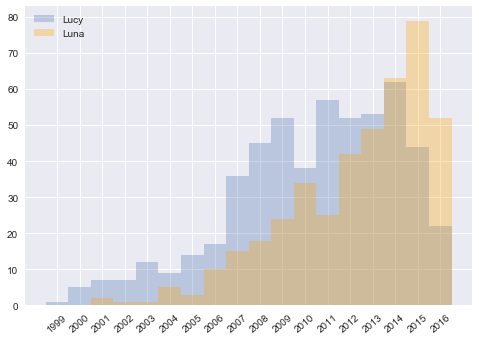

In [139]:
s1=df[df['AnimalName']=='LUCY'].groupby('birth_year')['AnimalName'].count()
s2=df[df['AnimalName']=='LUNA'].groupby('birth_year')['AnimalName'].count()

plt.bar(s1.index,s1,width=1,tick_label=s1.index,alpha=.3)
plt.xticks(rotation=40)

plt.bar(s2.index,s2,width=1,color='orange',alpha=.3)
plt.legend(['Lucy','Luna'])
plt.show()

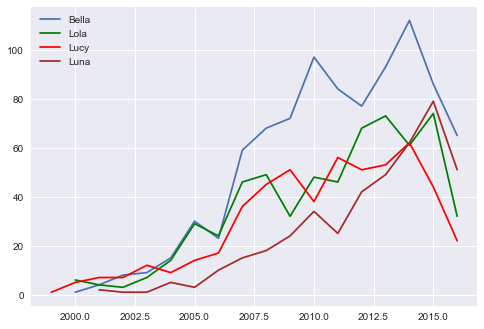

In [158]:
female=female[female['birth_year']!=2017] #too little data for this year
s1=female[female['AnimalName']=='BELLA'].groupby('birth_year')['AnimalName'].count()
s2=female[female['AnimalName']=='LOLA'].groupby('birth_year')['AnimalName'].count()
s3=female[female['AnimalName']=='LUCY'].groupby('birth_year')['AnimalName'].count()
s4=female[female['AnimalName']=='LUNA'].groupby('birth_year')['AnimalName'].count()

plt.plot(s1.index,s1)
plt.plot(s2.index,s2,color='green')
plt.plot(s3.index,s3,color='red')
plt.plot(s4.index,s4,color='brown')
plt.legend(['Bella','Lola','Lucy','Luna'])
plt.show()

In [ ]:
male['AnimalName']=male['AnimalName'].str.strip()
male_gb=male.groupby('birth_year')['AnimalName']
male_gb.apply(top_value_count).reset_index()

I do the same for male names. First, most popular names in the whole city:

In [ ]:
from bokeh.io import show, output_notebook
from bokeh.plotting import figure

output_notebook()

top_male_names=male.groupby("AnimalName")['ZipCode'].count().sort_values(ascending=False).head()
names=top_male_names.index.tolist()
counts=top_male_names.values
p=figure(x_range=names,title='Top Male Names')
p.vbar(x=names,top=counts,width=.8)

show(p)

In [ ]:
And the most popular male names by borough:

In [ ]:
criterion=((male['Borough']=='Manhattan') | (male['Borough']=='Bronx') | (male['Borough']=='Brooklyn') | (male['Borough']=='Queens') | (male['Borough']=='Staten Island'))
filtered_male_borough=male[criterion]
filtered_male_borough.head()

In [ ]:
from bokeh.models import ColumnDataSource, FactorRange, HoverTool,Legend,LegendItem
from math import pi
from bokeh.palettes import small_palettes

output_notebook()

def top_value_count(x,n=5):
    return x.value_counts().head(n)

male_gb=filtered_male_borough.groupby('Borough')['AnimalName']
top_male_names=male_gb.apply(top_value_count).reset_index()

l=[]
for i in range (top_male_names.shape[0]):
    tup=(top_male_names.iloc[i,0],top_male_names.iloc[i,1])
    l.append(tup)

colors=small_palettes['Colorblind'][len(top_male_names['level_1'].unique())]

names=top_male_names['level_1'].unique()

colormap={i:colors[int(np.where(names==i)[0])] for i in names}

colors=[colormap[x] for x in top_male_names['level_1']]

source=ColumnDataSource(dict(x=l,counts=top_male_names['AnimalName'].tolist(),color=colors))

tools=["box_select", "hover", "reset","pan","box_zoom","wheel_zoom"]
tooltips=[('','@counts')]

p=figure(x_range=FactorRange(*l),plot_height=500,plot_width=900,tools=tools,tooltips=tooltips)

p.vbar(x='x', top='counts', source=source, width=0.9,fill_color='color',fill_alpha=.7)

p.xaxis.major_label_orientation = pi/4
p.x_range.range_padding = 0.02
p.xgrid.grid_line_color = None

show(p)

Finally, choose a neighborhood to see what are the most popular male names in it:

Let's look at the evolution of male names over time:

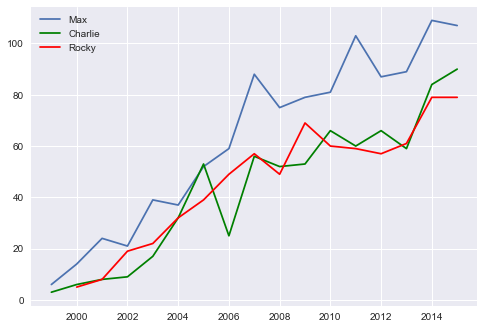

In [151]:
male=male[male['birth_year']!=2016] #too little data for this year
s1=male[male['AnimalName']=='MAX'].groupby('birth_year')['AnimalName'].count()
s2=male[male['AnimalName']=='CHARLIE'].groupby('birth_year')['AnimalName'].count()
s3=male[male['AnimalName']=='ROCKY'].groupby('birth_year')['AnimalName'].count()
plt.plot(s1.index,s1)
plt.plot(s2.index,s2,color='green')
plt.plot(s3.index,s3,color='red')
plt.legend(['Max','Charlie','Rocky'])
plt.show()

I now start building a dataframe for breed weights. The result will be a dataframe with three columns: `breed_name`, `sex`, `weight` (some breeds weigh differently depending on the dog's sex).   

In [ ]:
#get mean weights for each NTA
mean_weights=df.groupby('NTA')['weight'].mean()
mean_weights=mean_weights.to_frame().reset_index()
mean_weights.rename(columns={0:'NTA',1:'avg_weight'},inplace=True)
mean_weights.head()
mean_weights.info()

In [ ]:
#get 75 percentile weights for each neighborhood
def prct(x,p=75):
    return np.percentile(x,75)

percentile_75_weights_gb=df.dropna(axis=0,subset=['weight']).groupby('NTA')['weight'].apply(prct)
percentile_75_weights_gb=percentile_75_weights_gb.to_frame().reset_index()

percentile_75_weights_gb.rename(columns={'weight':'75_percentile_weight'},inplace=True)

percentile_75_weights_gb.head()

In [ ]:
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer
from bokeh.io import output_notebook, show, output_file
import geopandas as gpd

palette = brewer['Greens'][9]
palette= palette[::-1]

color_mapper = LinearColorMapper(palette = palette)

map_df=gpd.read_file('Neighborhood Tabulation Areas.geojson')
map_df.rename(columns={'ntacode':'NTA'},inplace=True)

merged_map=map_df.merge(mean_weights,on='NTA')

merged_map=merged_map.merge(percentile_75_weights_gb,on='NTA')


merged_map.to_file("nabes_weight.geojson", driver='GeoJSON')
gdf=gpd.read_file('nabes_weight.geojson')

output_notebook()

import json
#Read data to json.
merged_json = json.loads(gdf.to_json())
#Convert to String like object.
json_data = json.dumps(merged_json)

geo_source = GeoJSONDataSource(geojson=json_data)

tools=["box_select", "hover", "reset","pan","box_zoom","wheel_zoom"]
tooltips=[('neighborhood','@ntaname'),('average weight','@weight{0.00} lbs')]

p = figure(background_fill_color="lightgrey",tools=tools,tooltips=tooltips)

p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

#Add patch renderer to figure. 
p.patches('xs','ys', source = geo_source,fill_color = {'field' :'weight', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)

show(p)

In [ ]:
tooltips=[('neighborhood','@ntaname'),('25% dogs heavier than','@percentile_weight{0.00} lbs')]

p = figure(background_fill_color="lightgrey",tools=tools,tooltips=tooltips)

p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

p.patches('xs','ys', source = geo_source,fill_color = {'field' :'percentile_weight', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)

show(p)